<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/Data2020/BTC_AutomatedTrading_BAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Object-Oriented Programming in Python: State and Behavior](https://campus.datacamp.com/courses/object-oriented-programming-in-python)

# Define Class Functions

In [45]:
class BAH:
  def __init__(self, start_date, end_date):
    import pandas as pd 
    import numpy as np
    self.start = pd.to_datetime(start_date)
    self.end = pd.to_datetime(end_date)

  def signals(self, URL):
    import pandas as pd 
    import numpy as np
    data=pd.read_csv(URL,index_col='Unnamed: 0')
    data.index=pd.to_datetime(data.index)
    signals = pd.DataFrame(index=data.index)
    signals['positions']=0
    signals =signals.loc[self.start: self.end]
    signals.loc[self.start,'positions'] = 1.0
    signals.loc[self.end,'positions']=-1.0
    signals['PriceUSD'] = data['PriceUSD']
    signals=signals.dropna()
    return signals

  def signal_figure(self,signals):
    # Plot the buy signals
    import matplotlib.pyplot as plt
    fig, ax1 =plt.subplots()
    ax1.plot(signals.loc[signals.positions == 1.0].index, signals.PriceUSD[signals.positions == 1.0], '^', markersize=20, color='green')
         # Plot the sell signals
    ax1.plot(signals.loc[signals.positions == -1.0].index, signals.PriceUSD[signals.positions == -1.0],'v', markersize=20, color='red')
    ax1=signals['PriceUSD'].plot(ax=ax1, color='blue', lw=2.,figsize=(14, 10),legend=True)
    return
### we assume the transaction cost is 0.1%
  def portfoio(self,initial_capital, volume,signals):
      import pandas as pd 
      import numpy as np
      positions = pd.DataFrame(index=signals.index).fillna(0.0)
      positions['Q'] = volume
      positions['Q'][self.end]=0
      portfolio = positions.multiply(signals['PriceUSD'], axis=0) 
      pos_diff = positions.diff()
      portfolio['holdings'] = positions.multiply(signals['PriceUSD'],axis=0)
      portfolio['cash'] = initial_capital - (pos_diff.multiply(signals['PriceUSD'], axis=0)).cumsum()-((pos_diff.multiply(signals['PriceUSD'], axis=0)).abs()*0.001).cumsum()
      portfolio['total'] = portfolio['cash'] + portfolio['holdings']
      return portfolio
  def portfolio_figure(self,portfolio):
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-bright')
    portfolio[['holdings', 'cash', 'total']].plot(figsize=(14, 10),legend=True)
  def ROI(self, portfolio):
    ROI = portfolio['total'].iloc[-1]/initial_capital-1
    return ROI

# Generate result by defining parameters

### please provide the URL of the data

In [46]:
URL = 'https://raw.githubusercontent.com/sunshineluyao/CVML2021/main/BTC_2020_12_31.csv'

### please define start and end date of the buy and host strategy

In [47]:
BAH= BAH(start_date='2010-07-18	',end_date = '2020-12-31')

### print the signal table and figure

In [48]:
signals=BAH.signals(URL)
signals.head()

,positions,PriceUSD
2010-07-18,1,0.085840
2010-07-19,0,0.080800
2010-07-20,0,0.074736
2010-07-21,0,0.079193
2010-07-22,0,0.058470


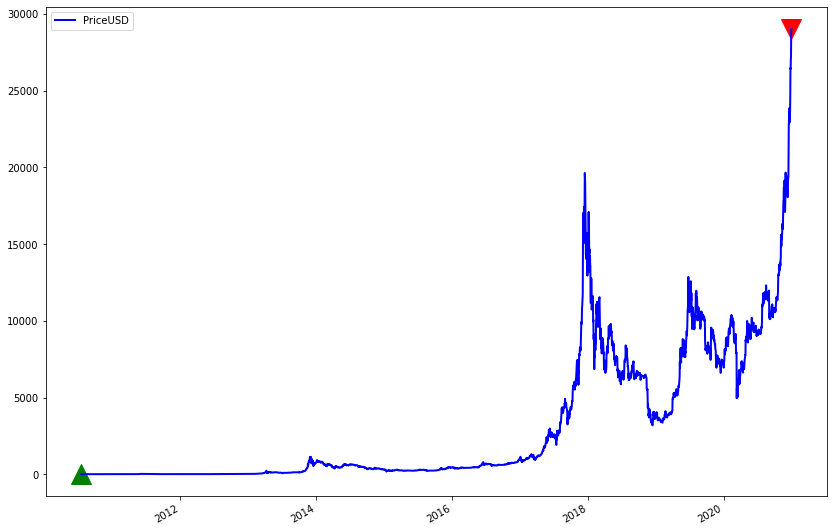

In [49]:
BAH.signal_figure(signals)

### Simulate and virtualize portfolio return 

In [50]:
### please provide the initial capital and the bitcoin to buy and sell each time
initial_capital = 100000
volume =100
portfolio=BAH.portfoio(initial_capital, volume,signals)
portfolio.head()

,Q,holdings,cash,total
2010-07-18,8.584000,8.584000,NaN,NaN
2010-07-19,8.080000,8.080000,100000.0,100008.080000
2010-07-20,7.473573,7.473573,100000.0,100007.473573
2010-07-21,7.919286,7.919286,100000.0,100007.919286
2010-07-22,5.846976,5.846976,100000.0,100005.846976


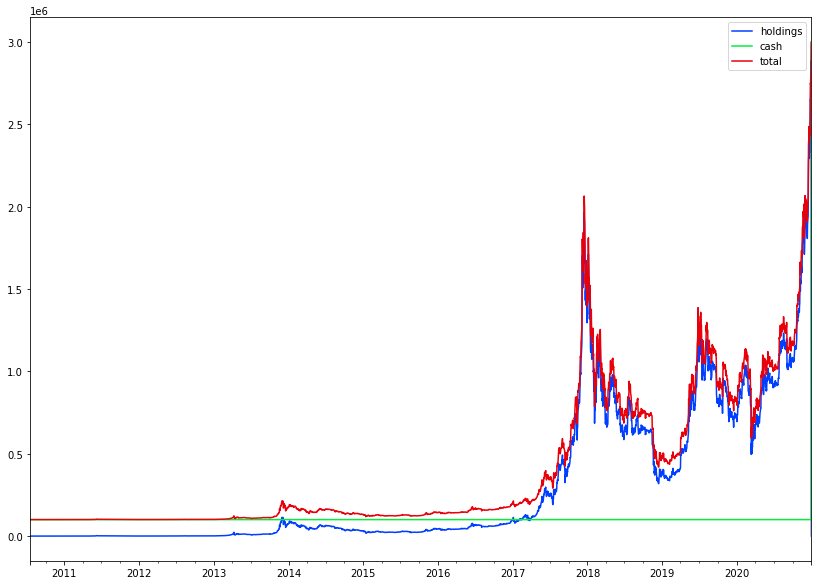

In [51]:
BAH.portfolio_figure(portfolio)

In [53]:
BAH.ROI(portfolio)

28.993648741211576